# Wine Prediction

## Import Libraries & Load Dataset

In [5]:
#Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import joblib
import yaml


In [6]:
# load dataset
wine = pd.read_csv("../Dataset/winequality-red.csv")

df = wine.copy()

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Initial Imformation About Dataset

### Basic Information

In [7]:
print(df.columns)
print(df.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# rename the columns
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


- We can see the average of each column of the dataset. 

### Checking for Null or Missing values

In [11]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- It looks like there are no missing value. It means dataset can be processed.

# Data Visualzation

- Distribution variable target quality

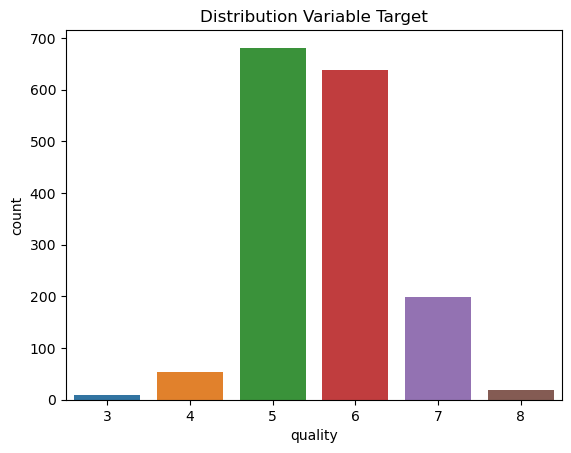

In [12]:
sns.countplot(data=df, x= 'quality')
plt.title('Distribution Variable Target')
plt.show()

- Visualize the correlation contents in red wine

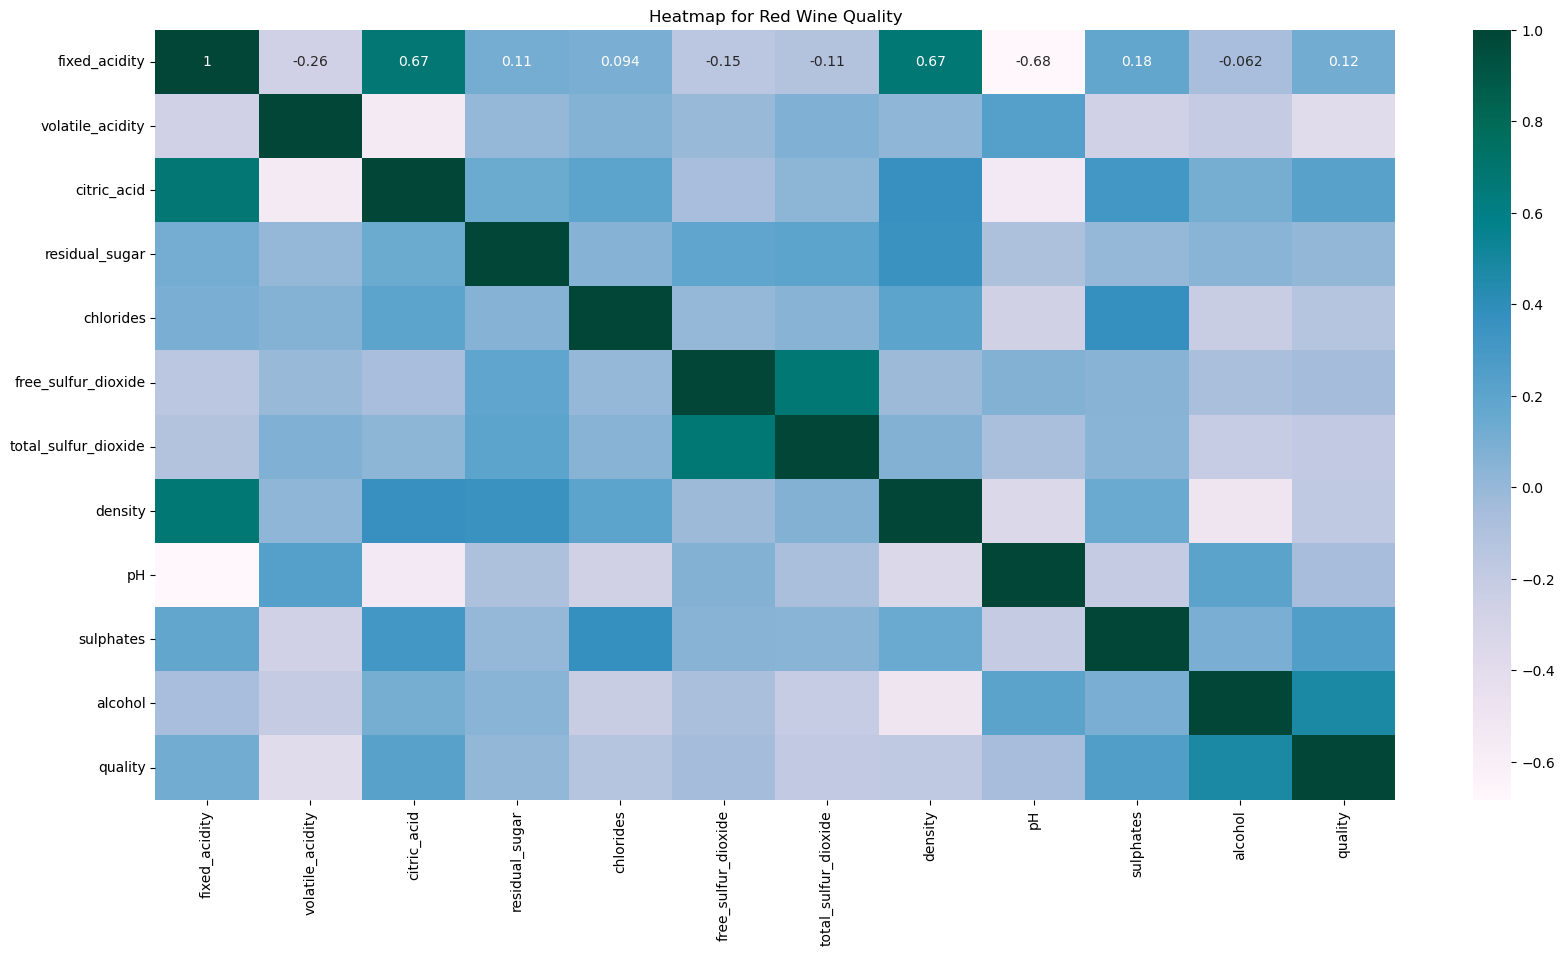

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap= 'PuBuGn')
plt.title("Heatmap for Red Wine Quality")
plt.show()

## Exploratory Data Analysis

- Feature Scaling

1. Scale the dataset by quality

- After reading the Red Wine Quality dataset description we find,
    - quality >= 7 is "good"
    - quality <= 7 is "bad"

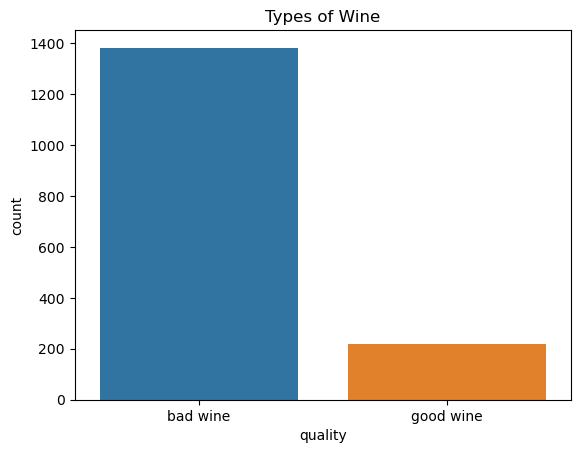

In [14]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

sns.countplot(data = df, x = 'quality')
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()


- from the above visualization we can see that the Dataset is skewed or unbalanced.

2. Resampling Dataset

- for skewed or unbalanced dataset, we can do over sampling using random over sampler for data balancing

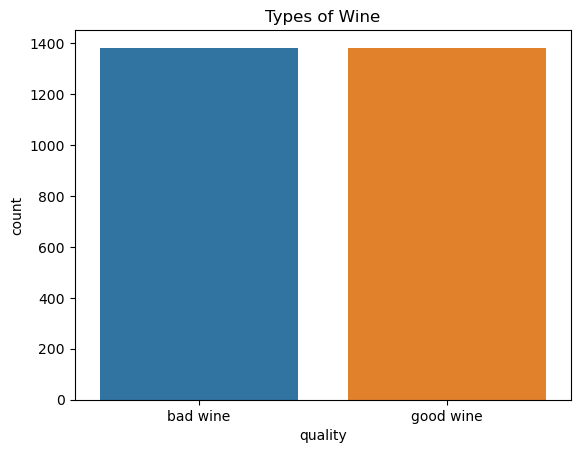

In [15]:
#parameter for requires seed
random_value = 1000

X = df.drop(['quality'], axis=1)
y = df.quality

#ran = RandomOverSampler(random_state=random_value)
#X_ros, y_ros = ran.fit_resample(X, y)
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)

sns.countplot(x=y_ros)
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

3. Preprocessing Dataset

- Split dataset into train and test

In [16]:
# split dataset to train and test variable 
# use test size of 20% of the data proportion
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=random_value)
X_train.shape, X_test.shape

((2211, 11), (553, 11))

- Scale dataset with StandardScaler

In [17]:
# scale with StandardScaler
scaler = StandardScaler()

# fit to data training
scaler.fit(X_train)

# transform
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## Training Models

### Logistic Regression

In [18]:
# Logistic Regression initialization
logreg = LogisticRegression(class_weight='balanced', random_state=random_value)

# Cross Validation
logreg_score = cross_val_score(estimator = logreg,
                               X = x_train, y= y_train,
                               scoring = 'recall',cv = 10,
                               verbose = 3, n_jobs=-1)

# Fit data training
logreg.fit(x_train, y_train)

# Predict data test
y_pred = logreg.predict(x_test)

print('Avarage Recall score', np.mean(logreg_score))
print('Test Recall score', recall_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    5.7s remaining:   13.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.9s remaining:    2.5s


Avarage Recall score 0.8546519246519246
Test Recall score 0.8467153284671532


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished


- Based on the similar results obtained from the scores, it can be concluded that the model's performance is good in predicting the target variable.

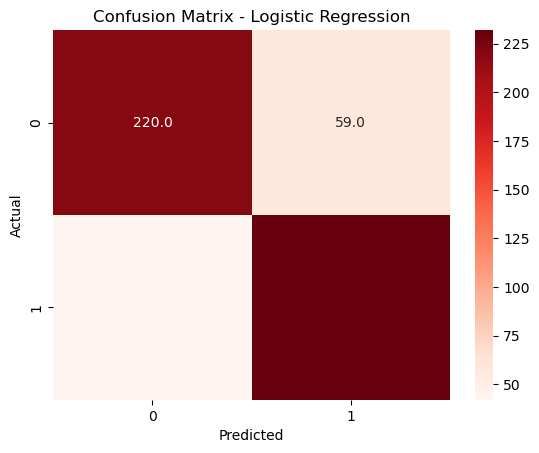

In [19]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap Confusion Matrix
sns.heatmap(conf_mat, cmap = 'Reds', annot = True, fmt='.1f')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model prediction :
- Our model predicted '0' correctly 220 times while predicting '0' incorrectly 59 times
    
- Also it predicted '1' incorrectly 47 times while predicting '1' correctly 227 times

1. Hyperparameter Tuning

In [20]:
# Grid parameters
log_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
    }
# Use RandomizedSearchCV
logreg_cv = RandomizedSearchCV(estimator=logreg, param_distributions=log_grid,
                                scoring='recall', cv=10)

# Fit to model
logreg_cv.fit(X_train, y_train)

# Best Score
print(f'Best score: {logreg_cv.best_score_}')
print(f'Best params: {logreg_cv.best_params_}')

c:\Users\Nimis\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best score: 0.851965601965602
Best params: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


2. Compare Score

In [21]:
# Logistic Regression initialization
logreg_tuned = LogisticRegression(**logreg_cv.best_params_,class_weight='balanced', random_state=random_value)

# Cross Validation
logreg_tuned_score = cross_val_score(estimator = logreg_tuned,
                               X = x_train, y= y_train,
                               scoring = 'recall',cv = 10,
                               verbose = 0)

# Fit data training
logreg_tuned.fit(x_train, y_train)

# Predict data test
y_pred_tuned = logreg_tuned.predict(x_test)

# Cek Score
print('Avarage Recall score', np.mean(logreg_score))
print('Test Recall score', recall_score(y_test, y_pred))
print('Avarage Recall score Tuning', np.mean(logreg_tuned_score))
print('Test Recall score Tuning', recall_score(y_test, y_pred_tuned))


Avarage Recall score 0.8546519246519246
Test Recall score 0.8467153284671532
Avarage Recall score Tuning 0.8546519246519246
Test Recall score Tuning 0.8467153284671532


- From the obtained results, the performance has slightly improved.

### Random Forest

In [22]:
# Random Forest Regression initialization
rfc = RandomForestClassifier(n_estimators=100, random_state=random_value)

# Cross Validation
rf_score = cross_val_score(estimator = rfc,
                               X = x_train, y= y_train,
                               scoring = 'recall',cv = 10,
                               verbose = 3, n_jobs=-1)

# Fit data training
rfc.fit(x_train, y_train)

# Predict data test
y_pred = rfc.predict(x_test)

print('Avarage Recall score', np.mean(rf_score))
print('Test Recall score', recall_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished


Avarage Recall score 0.9675020475020475
Test Recall score 0.9744525547445255


- Based on the similar results obtained from the scores, it can be concluded that the model's performance is good in predicting the target variable.

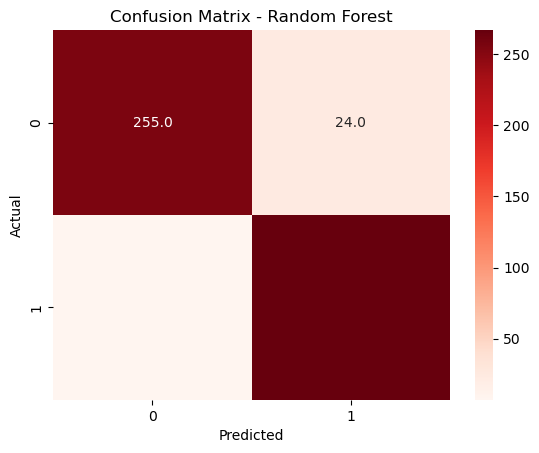

In [23]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap Confusion Matrix
sns.heatmap(conf_mat, cmap = 'Reds', annot = True, fmt='.1f')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model prediction :
- Our model predicted '0' correctly 253 times while predicting '0' incorrectly 26 times
    
- Also it predicted '1' incorrectly 0 times while predicting '8' correctly 266 times

1. Hyperparameter Tuning

In [24]:
# Grid parameters
rf_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 5, 10]
                }
                
# Use RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_grid,
                            scoring='recall', cv=10)

# Fit to model
rf_cv.fit(X_train, y_train)

# Best Score
print(f'Best score: {rf_cv.best_score_}')
print(f'Best params: {rf_cv.best_params_}')

Best score: 0.9557411957411958
Best params: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}


2. Compare Score

In [25]:
# Random Forest Regression initialization
rf_tuned = RandomForestClassifier(**rf_cv.best_params_, random_state=random_value)

# Cross Validation
rf_tuned_score = cross_val_score(estimator = rf_tuned,
                               X = x_train, y= y_train,
                               scoring = 'recall',cv = 10,
                               verbose = 0)

# Fit data training
rf_tuned.fit(x_train, y_train)

# Predict data test
y_pred_tuned = rf_tuned.predict(x_test)

# Cek Score
print('Avarage Recall score', np.mean(rf_score))
print('Test Recall score', recall_score(y_test, y_pred))
print('Avarage Recall score Tuning', np.mean(rf_tuned_score))
print('Test Recall score Tuning', recall_score(y_test, y_pred_tuned))

Avarage Recall score 0.9675020475020475
Test Recall score 0.9744525547445255
Avarage Recall score Tuning 0.9548402948402949
Test Recall score Tuning 0.9598540145985401


- From the obtained results, the performance has slightly improved.

### Decision Tree

In [26]:
# DecisionTree Regression initialization
dtc = DecisionTreeClassifier(random_state=random_value)

# Cross Validation
dt_score = cross_val_score(estimator = dtc,
                               X = x_train, y= y_train,
                               scoring = 'recall',cv = 10,
                               verbose = 3, n_jobs=-1)

# Fit data training
dtc.fit(x_train, y_train)

# Predict data test
y_pred = dtc.predict(x_test)

print('Avarage Recall score', np.mean(dt_score))
print('Test Recall score', recall_score(y_test, y_pred))

Avarage Recall score 0.9151760851760852
Test Recall score 0.9087591240875912


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


- Based on the similar results obtained from the scores, it can be concluded that the model's performance is good in predicting the target variable.

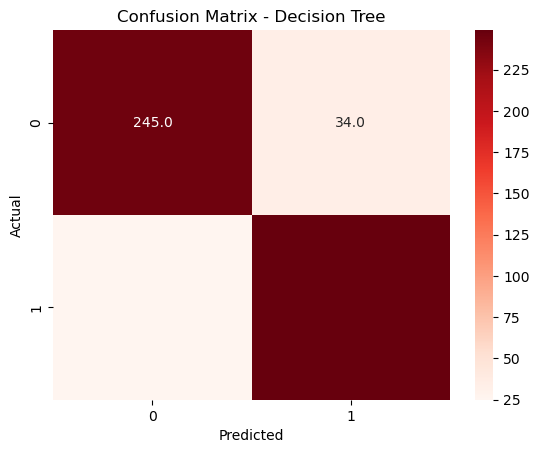

In [27]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap Confusion Matrix
sns.heatmap(conf_mat, cmap = 'Reds', annot = True, fmt='.1f')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model prediction :
- Our model predicted '0' correctly 250 times while predicting '0' incorrectly 29 times
    
- Also it predicted '1' incorrectly 19 times while predicting '1' correctly 255 times

1. Hyperparameter Tuning

In [28]:
# Grid parameters
dt_grid = {
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]
            }
                
# Use RandomizedSearchCV
dt_cv = RandomizedSearchCV(estimator=dtc, param_distributions=dt_grid,
                            scoring='recall', cv=10)

# Fit to model
dt_cv.fit(X_train, y_train)

# Best Score
print(f'Best score: {dt_cv.best_score_}')
print(f'Best params: {dt_cv.best_params_}')

c:\Users\Nimis\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best score: 0.9286895986895987
Best params: {'min_samples_split': 2, 'max_depth': 10}


2. Compare Score

In [29]:
# DecisionTree Regression initialization
dt_tuned = RandomForestClassifier(**dt_cv.best_params_, random_state=random_value)

# Cross Validation
dt_tuned_score = cross_val_score(estimator = dt_tuned,
                               X = x_train, y= y_train,
                               scoring = 'recall',cv = 10,
                               verbose = 0)

# Fit data training
dt_tuned.fit(x_train, y_train)

# Predict data test
y_pred_tuned = dt_tuned.predict(x_test)

# Cek Score
print('Avarage Recall score', np.mean(dt_score))
print('Test Recall score', recall_score(y_test, y_pred))
print('Avarage Recall score Tuning', np.mean(dt_tuned_score))
print('Test Recall score Tuning', recall_score(y_test, y_pred_tuned))

Avarage Recall score 0.9151760851760852
Test Recall score 0.9087591240875912
Avarage Recall score Tuning 0.9638902538902541
Test Recall score Tuning 0.9635036496350365


- From the obtained results, the performance has slightly improved.